In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [14]:


games_df = pd.read_csv('data/downsized/games.csv')

In [18]:

# Separate into the Year, Day of the week from teh date release
games_df['date_release_map'] = games_df['date_release'].map(lambda x: pd.to_datetime(x))
games_df['year'] = games_df['date_release_map'].map(lambda x: x.year)
games_df['day_of_week'] = games_df['date_release_map'].map(lambda x: x.dayofweek)
games_df['month'] = games_df['date_release_map'].map(lambda x: x.month)
games_df['day_of_month'] = games_df['date_release_map'].map(lambda x: x.day)
games_df['day_of_year'] = games_df['date_release_map'].map(lambda x: x.dayofyear)
games_df['timestamp'] = games_df['date_release_map'].map(lambda x: x.timestamp())



In [15]:
games_df.describe()

app_id  positive_ratio  user_reviews  price_final  \
count  2.494000e+03     2494.000000  2.494000e+03  2494.000000   
mean   8.658129e+05       85.283881  2.785680e+04    19.129198   
min    1.000000e+01       37.000000  1.000000e+01     0.000000   
25%    3.888075e+05       80.000000  8.142500e+02     9.752500   
50%    8.143750e+05       88.000000  3.491000e+03    16.995000   
75%    1.272242e+06       93.000000  1.434975e+04    24.990000   
max    2.220810e+06      100.000000  7.494460e+06   149.990000   
std    5.438575e+05       10.101670  1.783914e+05    14.824553   

       price_original     discount               date_release_map  \
count     2494.000000  2494.000000                           2494   
mean        15.237338     6.039294  2018-11-25 23:44:59.278267648   
min          0.000000     0.000000            1998-11-08 00:00:00   
25%          0.000000     0.000000            2016-11-05 00:00:00   
50%         14.990000     0.000000            2019-10-16 12:00:00   
75%         19.990000     0.000000            2021-11-01 00:00:00   
max        149.990000    90.000000            2023-08-22 00:00:00   
std         14.595069    18.742541                            NaN   

              year  day_of_week        month  day_of_month  day_of_year  \
count  2494.000000   2494.00000  2494.000000   2494.000000  2494.000000   
mean   2018.365277      2.22093     6.965116     15.837209   196.658380   
min    1998.000000      0.00000     1.000000      1.000000     1.000000   
25%    2016.000000      1.00000     4.000000      9.000000   110.000000   
50%    2019.000000      2.00000     7.000000     16.000000   209.000000   
75%    2021.000000      3.00000    10.000000     23.000000   286.000000   
max    2023.000000      6.00000    12.000000     31.000000   363.000000   
std       3.684305      1.37674     3.340904      8.604281   100.893102   

          timestamp  
count  2.494000e+03  
mean   1.543189e+09  
min    9.104832e+08  
25%    1.478304e+09  
50%    1.571227e+09  
75%    1.635725e+09  
max    1.692662e+09  
std    1.162955e+08

In [ ]:
# Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
#        'positive_ratio', 'user_reviews', 'price_final', 'price_original',
#        'discount', 'steam_deck'],
#       dtype='object')

APP_ID = 'app_id'
TITLE = 'title'
DATE_RELEASE = 'date_release'
WIN = 'win'
MAC = 'mac'
LINUX = 'linux'
RATING = 'rating'
POSITIVE_RATIO = 'positive_ratio'
USER_REVIEWS = 'user_reviews'
PRICE_FINAL = 'price_final'
PRICE_ORIGINAL = 'price_original'
DISCOUNT = 'discount'
STEAM_DECK = 'steam_deck'



In [16]:
# Manual hot encodes: win, mac, steam_deck linux,  to 1 or 0 if True/False

games_df['win'] = games_df['win'].map(lambda x: 1 if x == True else 0)
games_df['mac'] = games_df['mac'].map(lambda x: 1 if x == True else 0)
games_df['linux'] = games_df['linux'].map(lambda x: 1 if x == True else 0)
games_df['steam_deck'] = games_df['steam_deck'].map(lambda x: 1 if x == True else 0)


In [19]:
games_df['count_platforms'] = games_df['win'] + games_df['mac'] + games_df['linux'] + games_df['steam_deck']

In [24]:
games_df.head()

app_id                                title date_release  win  mac  linux  \
0  250460                   Bridge Constructor   2013-10-16    1    1      1   
1  321290  Dandelion - Wishes brought to you -   2014-09-29    1    1      0   
2  367670                 Controller Companion   2015-05-04    1    0      0   
3  371970                               Barony   2015-06-23    1    1      1   
4   35000                          Mini Ninjas   2009-09-08    1    0      0   

            rating  positive_ratio  user_reviews  price_final  ...  discount  \
0  Mostly Positive              77           716         2.39  ...      88.0   
1    Very Positive              85           589        29.99  ...       0.0   
2    Very Positive              90          2323         2.99  ...       0.0   
3    Very Positive              92          3713        20.00  ...       0.0   
4    Very Positive              90          2895         9.99  ...       0.0   

   steam_deck  date_release_map  year  day_of_week  month  day_of_month  \
0           1        2013-10-16  2013            2     10            16   
1           1        2014-09-29  2014            0      9            29   
2           1        2015-05-04  2015            0      5             4   
3           1        2015-06-23  2015            1      6            23   
4           1        2009-09-08  2009            1      9             8   

   day_of_year     timestamp  count_platforms  
0          289  1.381882e+09                4  
1          272  1.411949e+09                3  
2          124  1.430698e+09                2  
3          174  1.435018e+09                4  
4          251  1.252368e+09                2  

[5 rows x 21 columns]

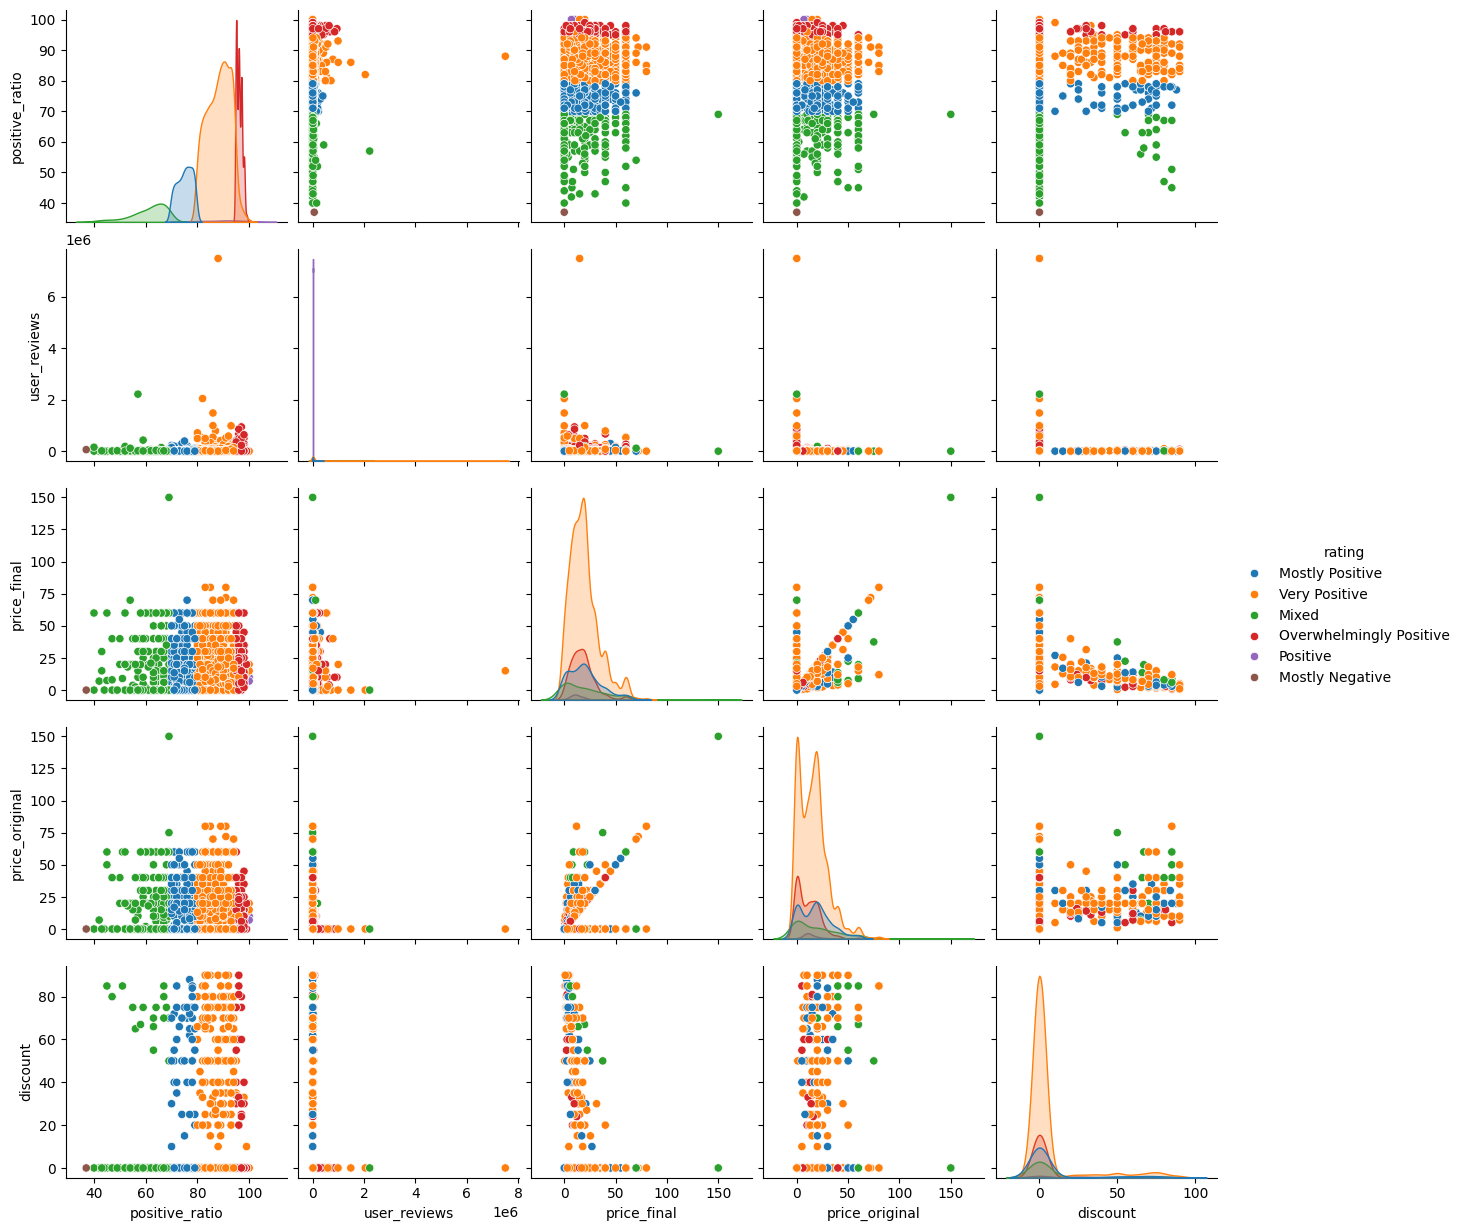

In [25]:


sns.pairplot(games_df[['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'rating']], hue='rating')

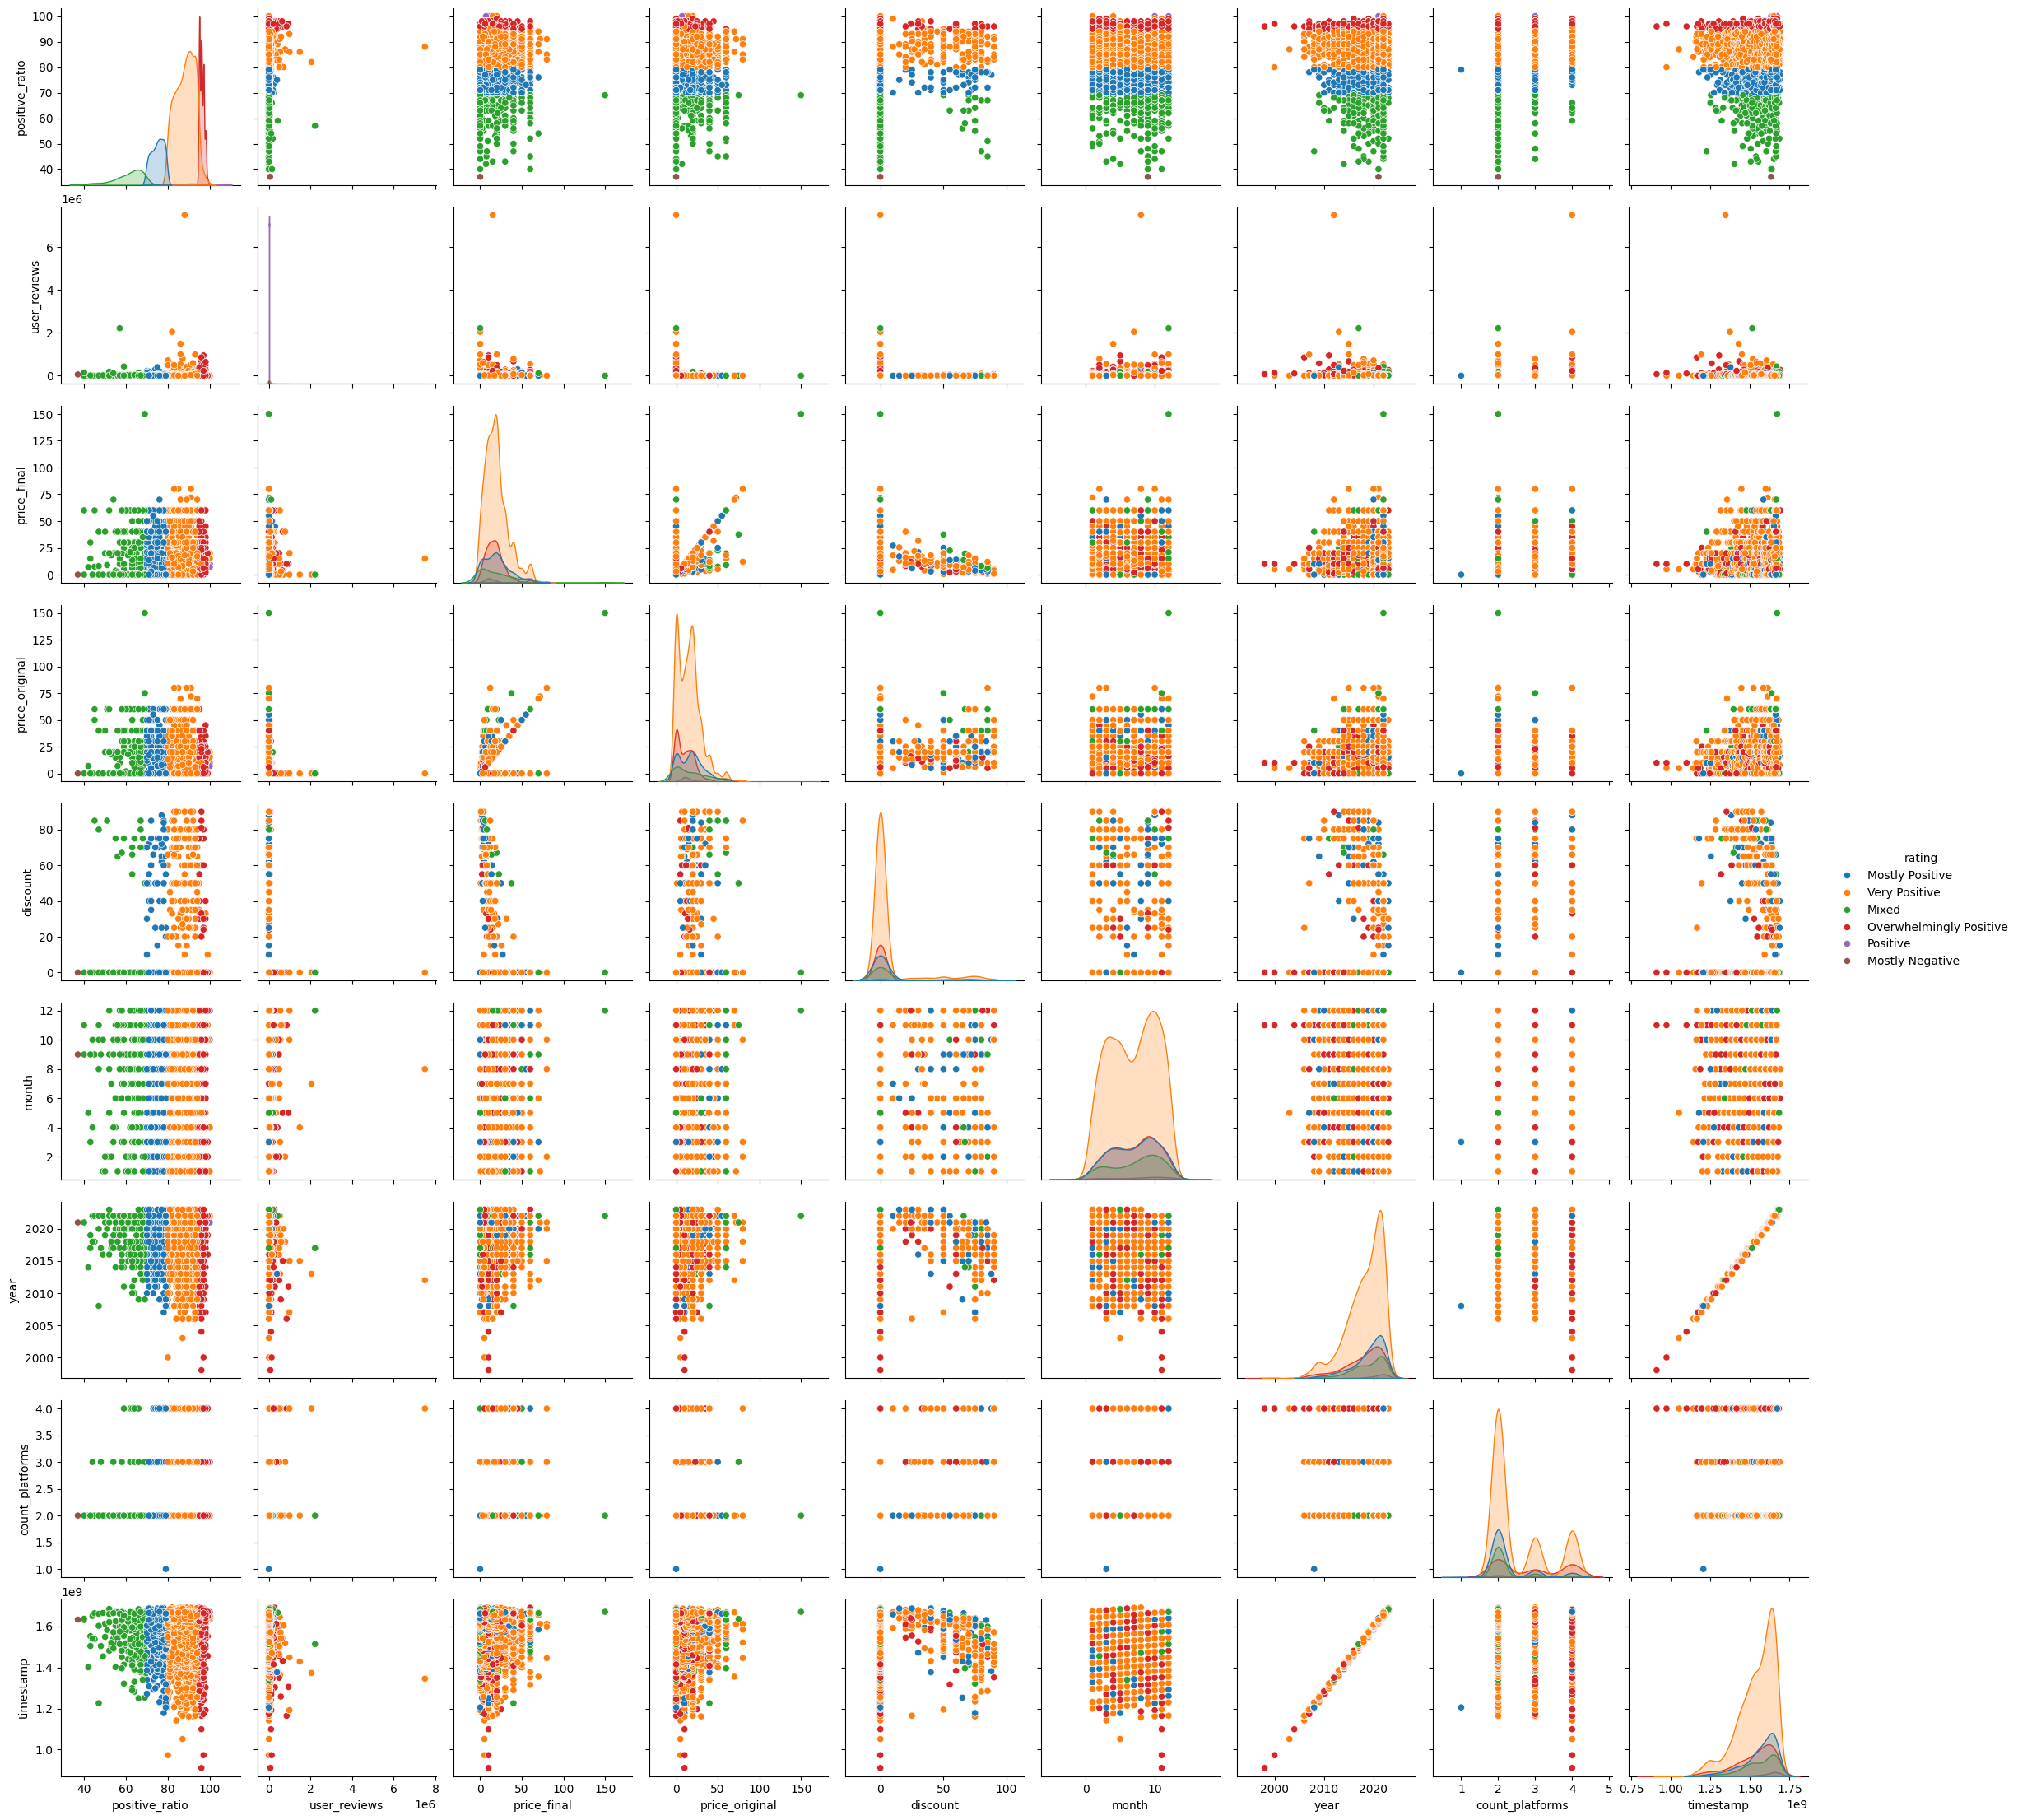

In [26]:

sns.pairplot(games_df[['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'rating', 'month', 'year', 'count_platforms', 'timestamp']], hue='rating')

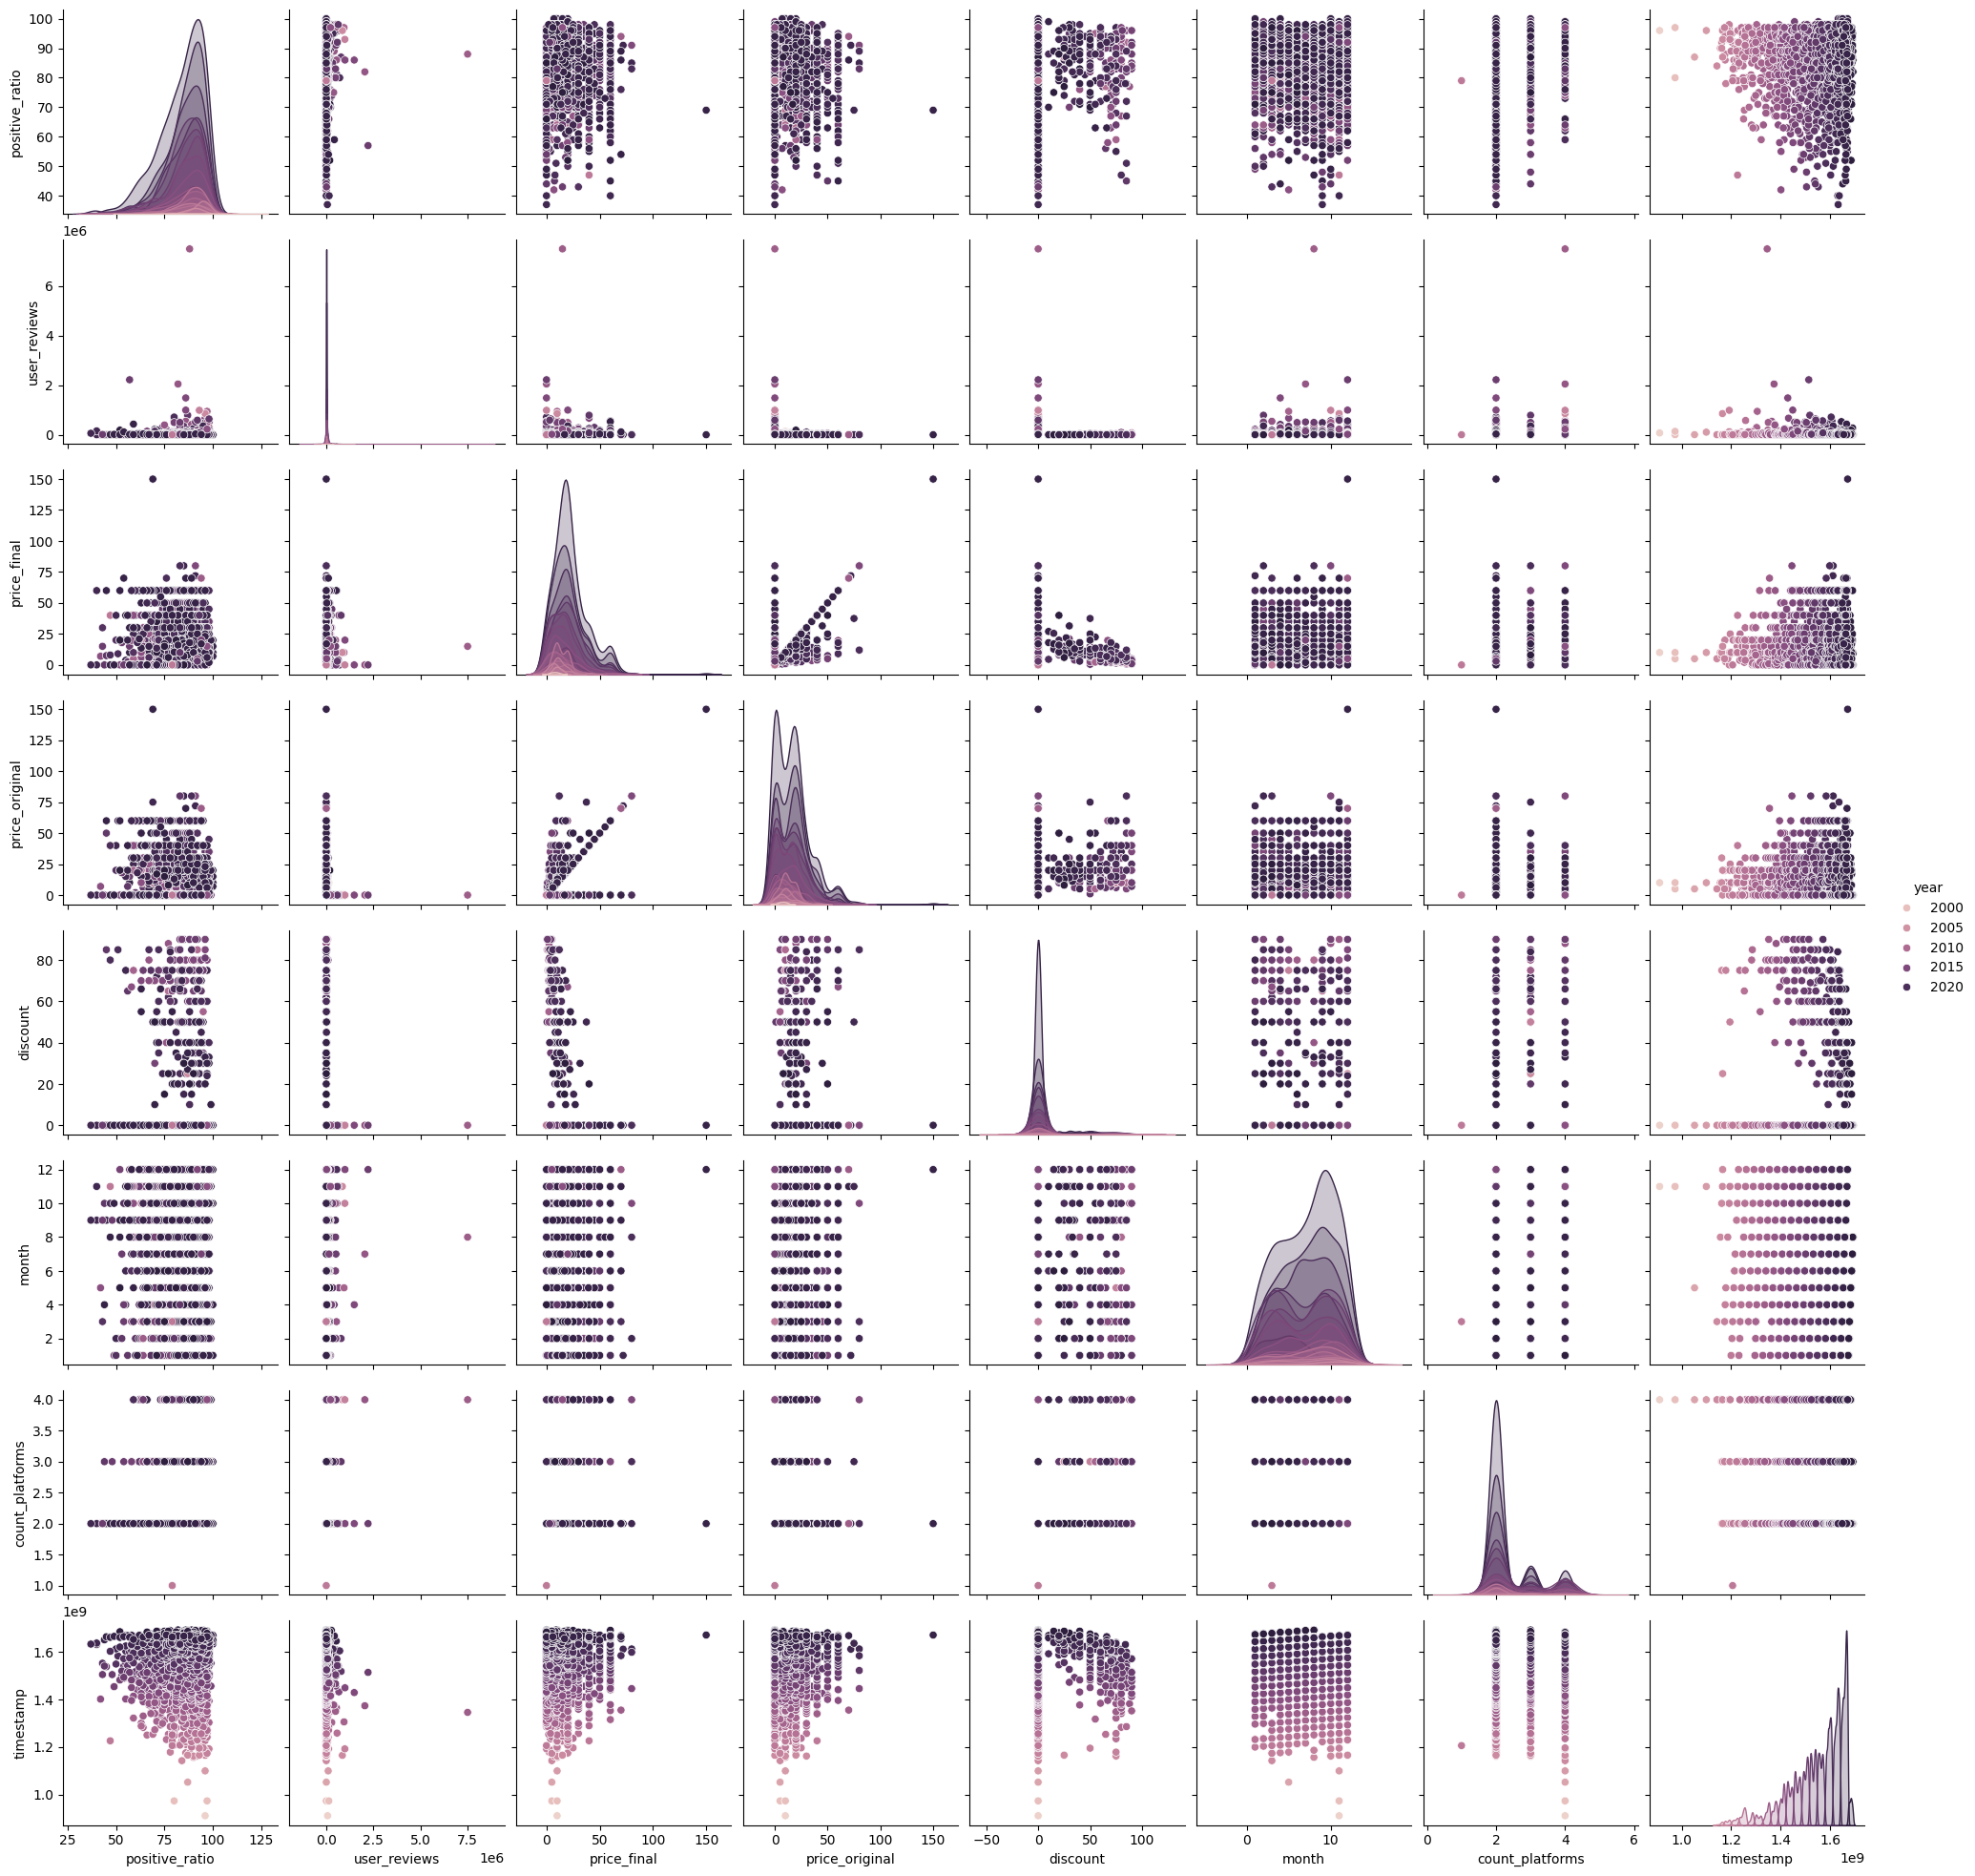

In [27]:

sns.pairplot(games_df[['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'rating', 'month', 'year', 'count_platforms', 'timestamp']], hue='year')

In [17]:
games_df.head()

app_id                                title date_release  win  mac  linux  \
0  250460                   Bridge Constructor   2013-10-16    1    1      1   
1  321290  Dandelion - Wishes brought to you -   2014-09-29    1    1      0   
2  367670                 Controller Companion   2015-05-04    1    0      0   
3  371970                               Barony   2015-06-23    1    1      1   
4   35000                          Mini Ninjas   2009-09-08    1    0      0   

            rating  positive_ratio  user_reviews  price_final  price_original  \
0  Mostly Positive              77           716         2.39           19.99   
1    Very Positive              85           589        29.99           29.99   
2    Very Positive              90          2323         2.99            2.99   
3    Very Positive              92          3713        20.00            0.00   
4    Very Positive              90          2895         9.99            9.99   

   discount  steam_deck date_release_map  year  day_of_week  month  \
0      88.0           1       2013-10-16  2013            2     10   
1       0.0           1       2014-09-29  2014            0      9   
2       0.0           1       2015-05-04  2015            0      5   
3       0.0           1       2015-06-23  2015            1      6   
4       0.0           1       2009-09-08  2009            1      9   

   day_of_month  day_of_year     timestamp  
0            16          289  1.381882e+09  
1            29          272  1.411949e+09  
2             4          124  1.430698e+09  
3            23          174  1.435018e+09  
4             8          251  1.252368e+09

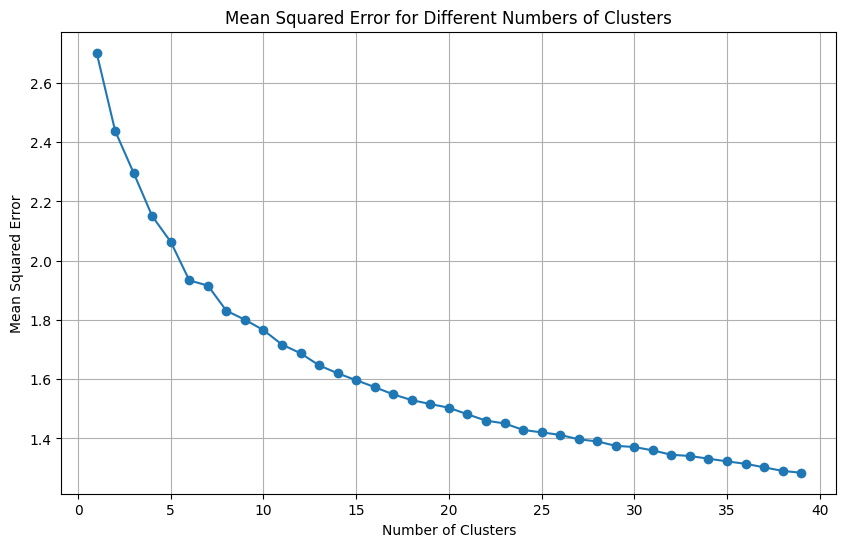

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'month', 'year', 'count_platforms', 'timestamp']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(games_df[features])

# Function to calculate MSE for a given number of clusters
def calculate_mse(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    mse = np.mean(np.min(kmeans.transform(data), axis=1))
    return mse

cluster_range = range(1, 40)
mse_values = []

for k in cluster_range:
    mse = calculate_mse(k, scaled_features)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, mse_values, marker='o')
plt.title('Mean Squared Error for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

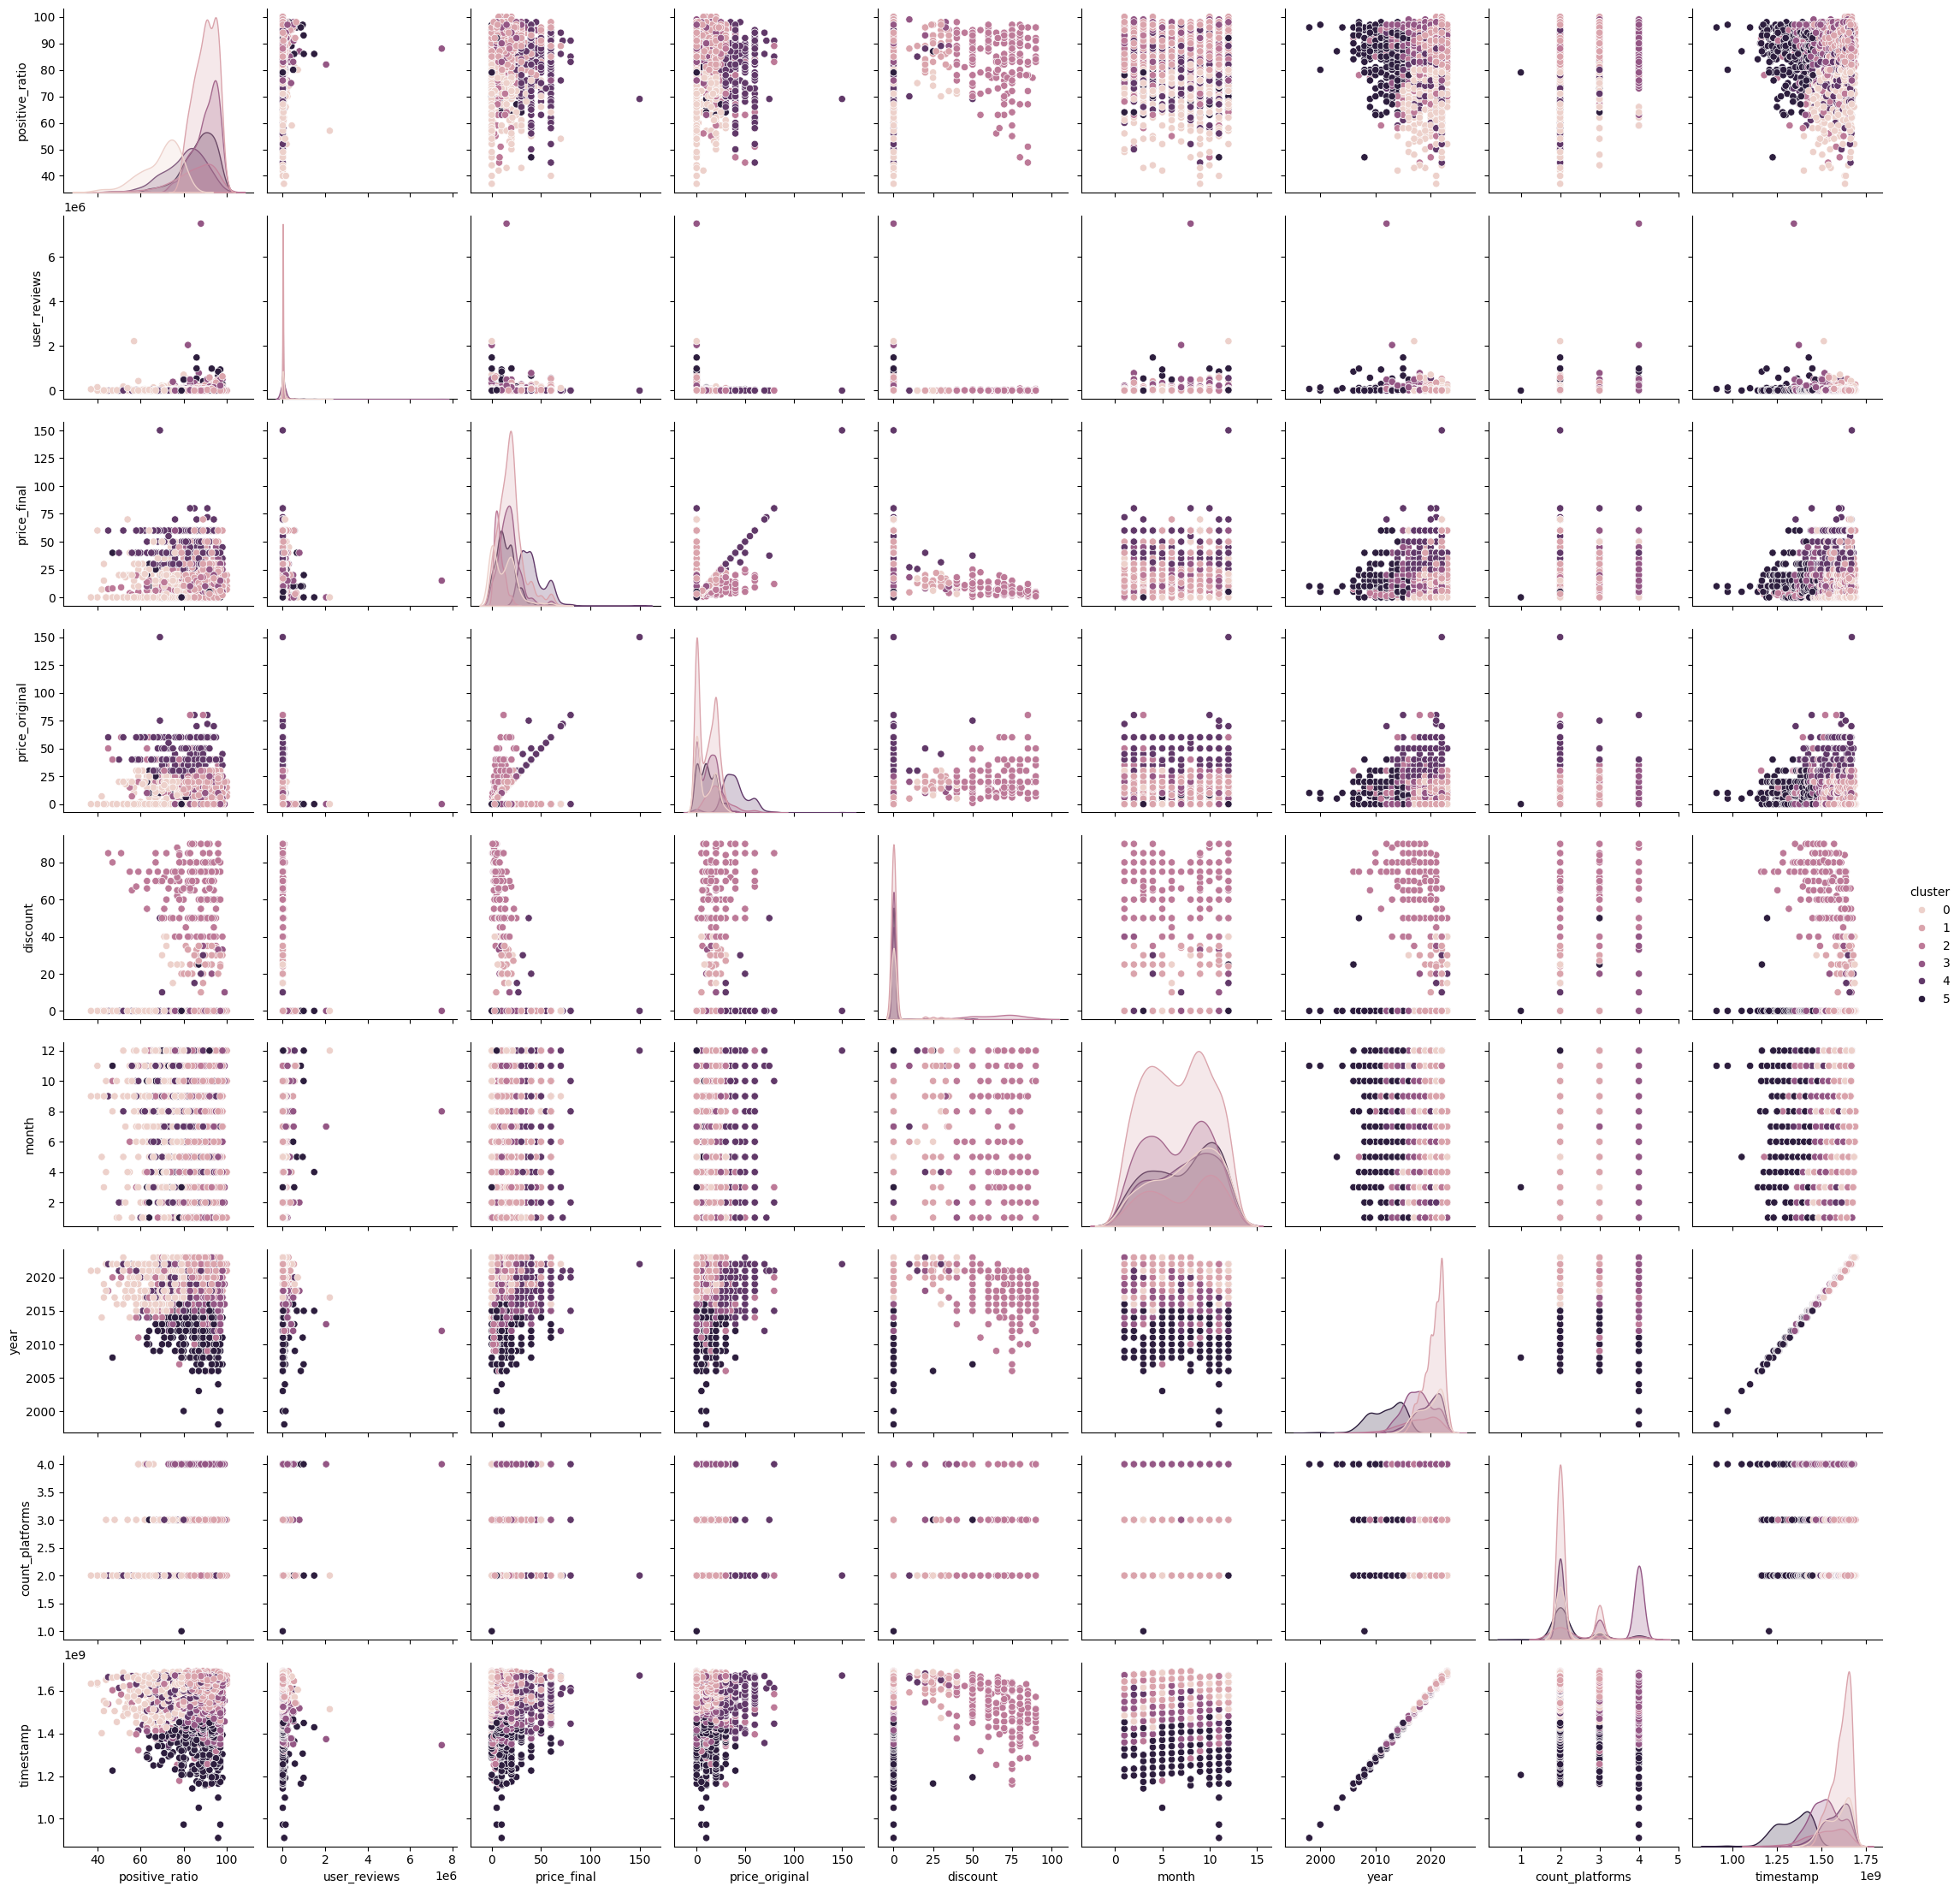

In [32]:

games_df = games_df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(games_df[features])

# Run Kmeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Choose the number of clusters
games_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize
sns.pairplot(games_df[['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'month', 'year', 'count_platforms', 'timestamp', 'cluster']], hue='cluster')
plt.show()

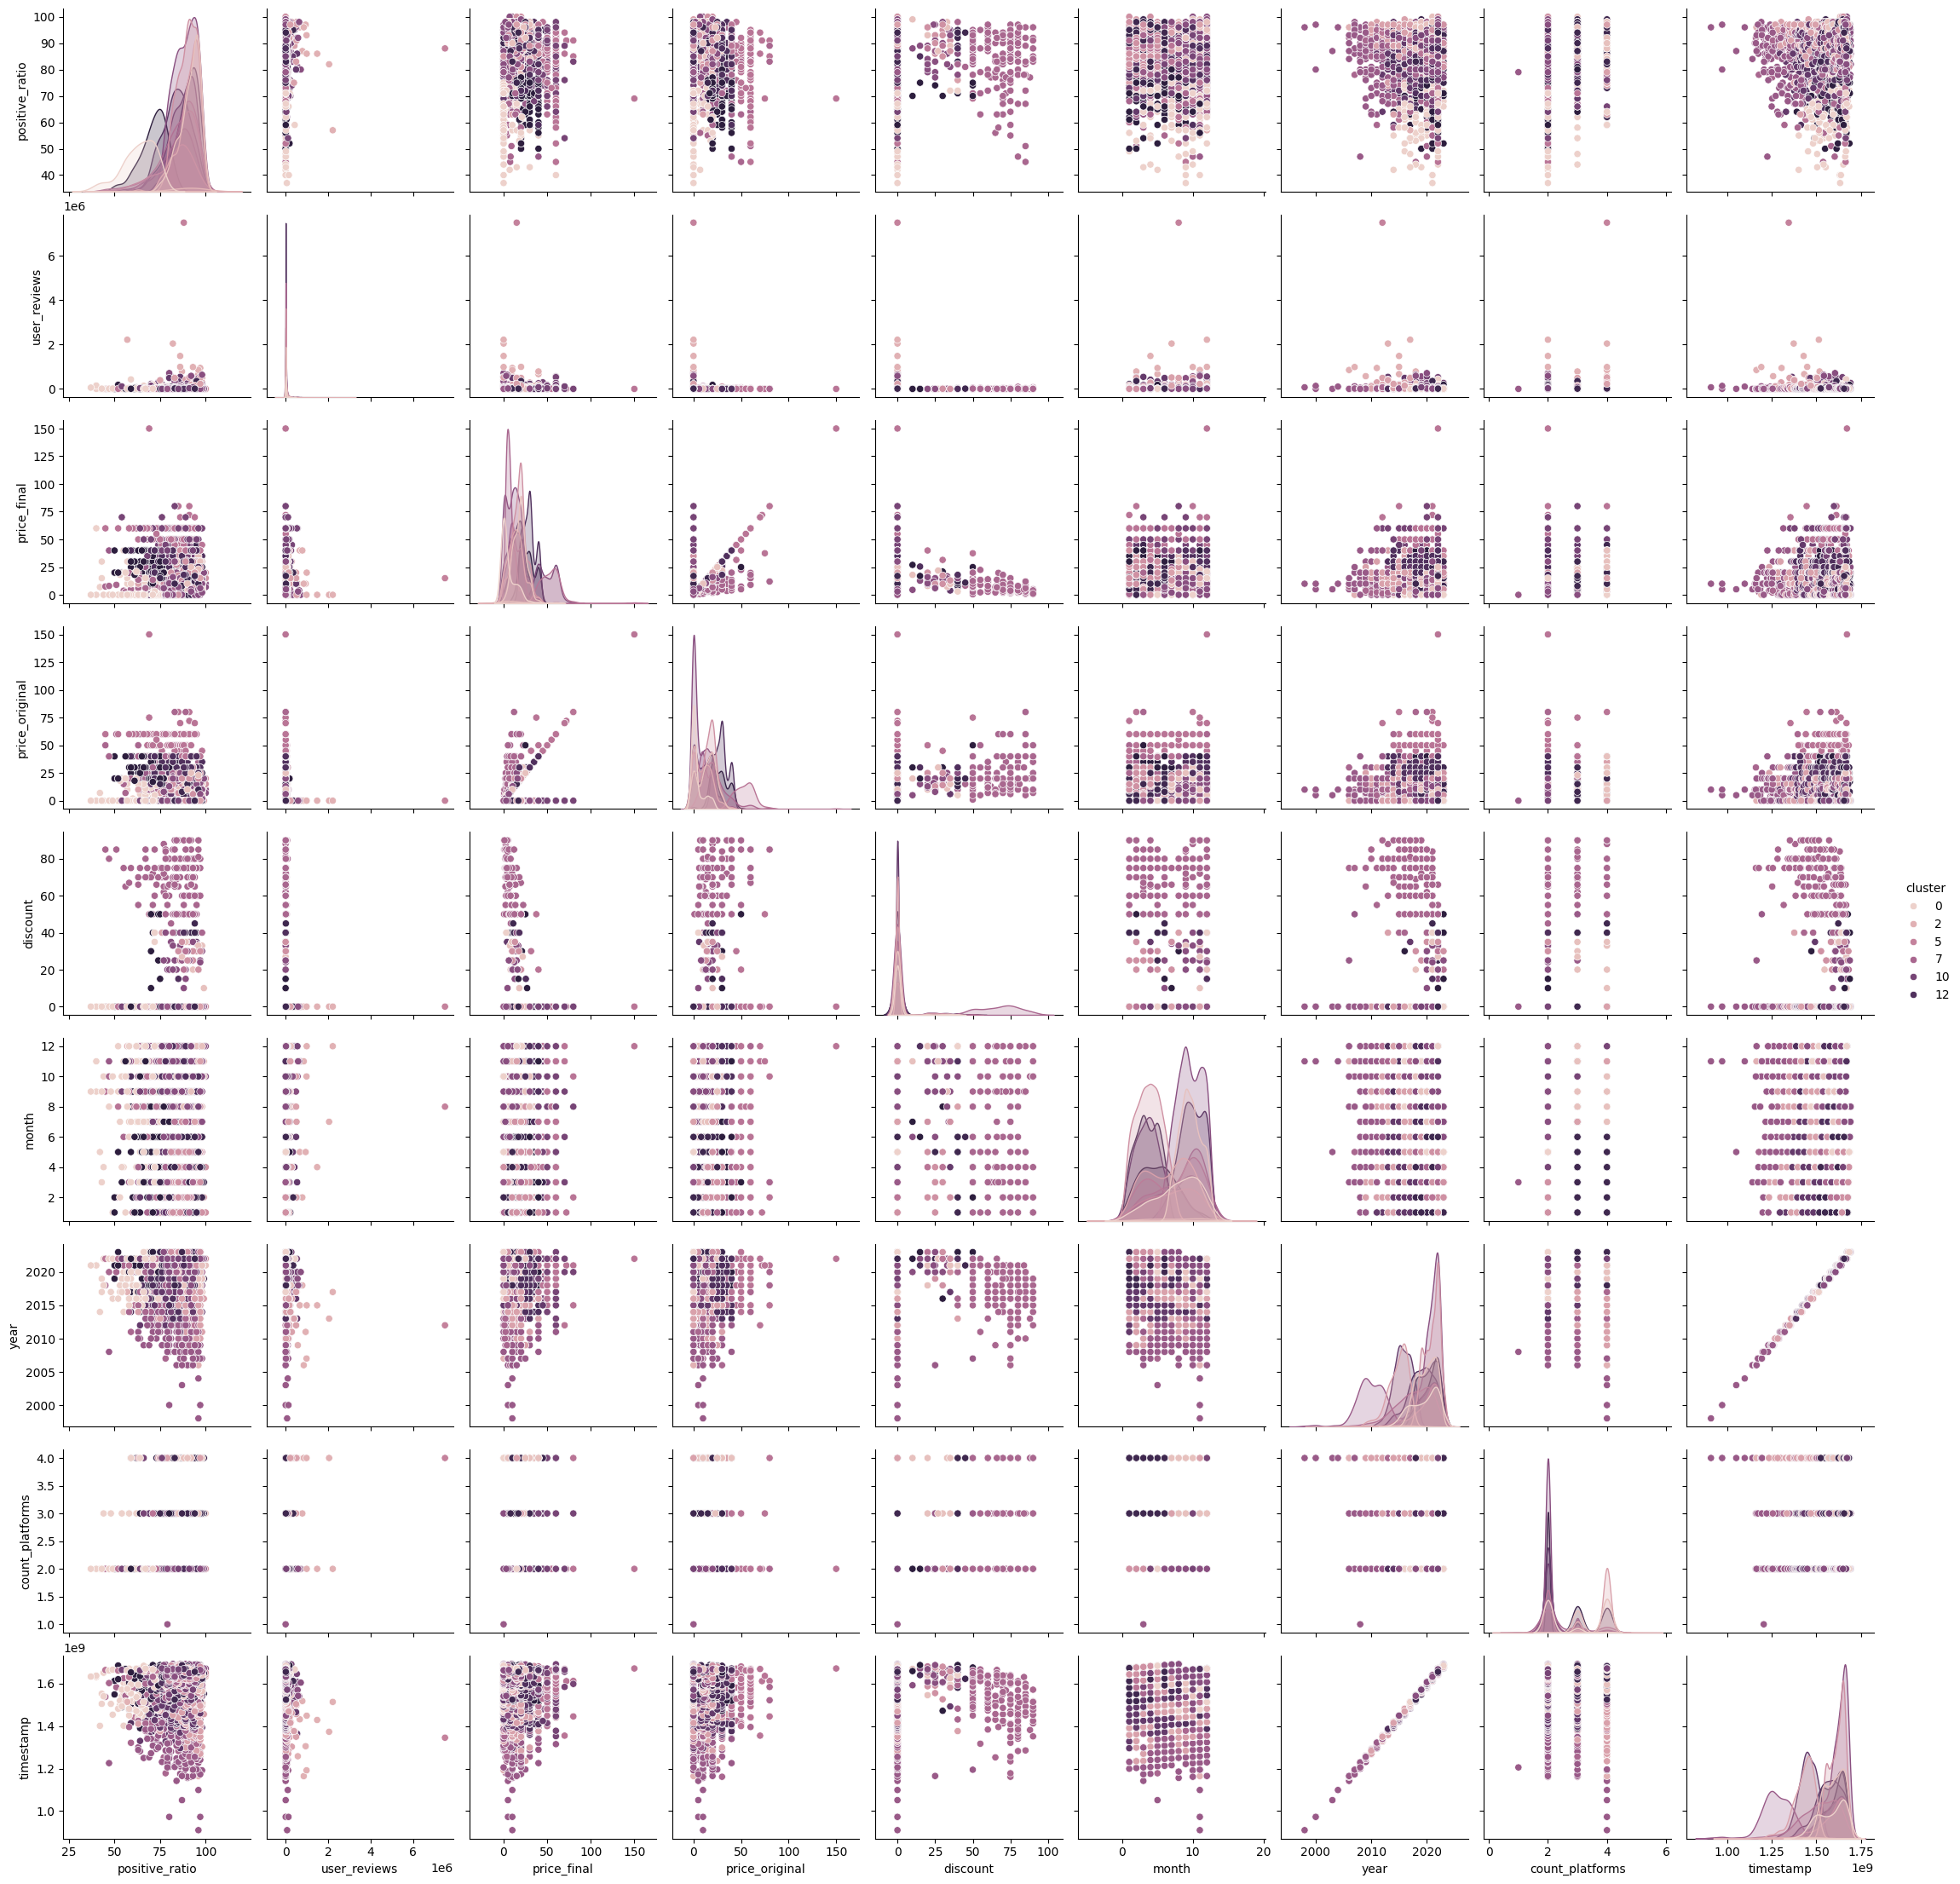

In [33]:

games_df = games_df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(games_df[features])

# Run Kmeans clustering
kmeans = KMeans(n_clusters=15, random_state=42)  # Choose the number of clusters
games_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize
sns.pairplot(games_df[['positive_ratio', USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'month', 'year', 'count_platforms', 'timestamp', 'cluster']], hue='cluster')
plt.show()

In [34]:
# Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
#        'positive_ratio', 'user_reviews', 'price_final', 'price_original',
#        'discount', 'steam_deck'],
#       dtype='object')

APP_ID = 'app_id'
TITLE = 'title'
DATE_RELEASE = 'date_release'
WIN = 'win'
MAC = 'mac'
LINUX = 'linux'
RATING = 'rating'
POSITIVE_RATIO = 'positive_ratio'
USER_REVIEWS = 'user_reviews'
PRICE_FINAL = 'price_final'
PRICE_ORIGINAL = 'price_original'
DISCOUNT = 'discount'
STEAM_DECK = 'steam_deck'



In [43]:

t_test_df = games_df[['user_reviews', 'rating']]
positive_ratings = t_test_df[t_test_df['rating'] == 'Overwhelmingly Positive']
negative_ratings = t_test_df[t_test_df['rating'] == 'Mixed']



In [44]:
positive_ratings

user_reviews                   rating
44            1668  Overwhelmingly Positive
58            1538  Overwhelmingly Positive
71            2473  Overwhelmingly Positive
76             877  Overwhelmingly Positive
78            2636  Overwhelmingly Positive
...            ...                      ...
2463          3459  Overwhelmingly Positive
2470          7699  Overwhelmingly Positive
2473          3934  Overwhelmingly Positive
2479          3050  Overwhelmingly Positive
2491        225815  Overwhelmingly Positive

[356 rows x 2 columns]

In [45]:
negative_ratings

user_reviews rating
12             133  Mixed
15             339  Mixed
16            3055  Mixed
24             153  Mixed
43             906  Mixed
...            ...    ...
2450          7268  Mixed
2454          2162  Mixed
2459         34522  Mixed
2469          8345  Mixed
2482         11641  Mixed

[198 rows x 2 columns]

In [46]:
stats.ttest_ind(positive_ratings['user_reviews'], negative_ratings['user_reviews'])

TtestResult(statistic=2.2852618510723697, pvalue=0.022675822907391608, df=552.0)

C:\Users\wangn\AppData\Local\Temp\ipykernel_13844\3666179889.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_ratings['user_reviews'], color='blue', shade=True, label='Positive Ratings')
C:\Users\wangn\AppData\Local\Temp\ipykernel_13844\3666179889.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_ratings['user_reviews'], color='red', shade=True, label='Negative Ratings')


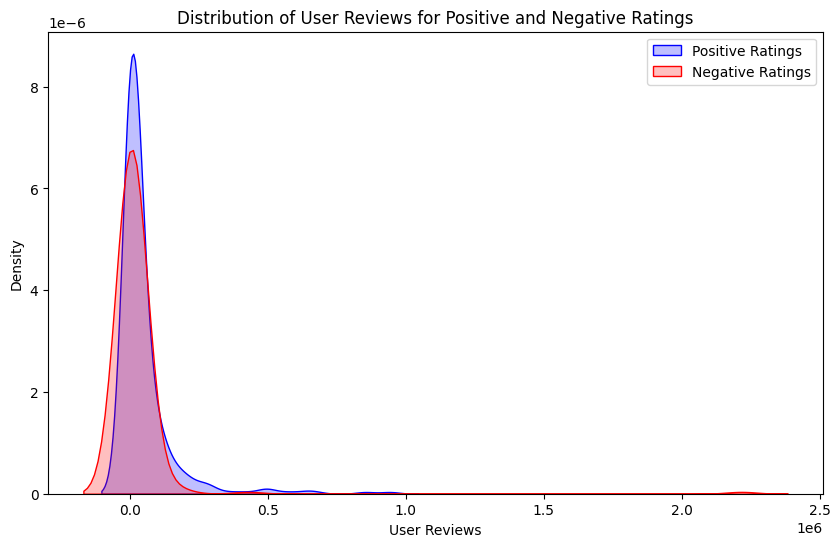

In [48]:
# Plot the distribution of user reviews for positive and negative ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(positive_ratings['user_reviews'], color='blue', shade=True, label='Positive Ratings')
sns.kdeplot(negative_ratings['user_reviews'], color='red', shade=True, label='Negative Ratings')
plt.title('Distribution of User Reviews for Positive and Negative Ratings')
plt.xlabel('User Reviews')
plt.ylabel('Density')
plt.legend()

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
filtered_df = games_df[games_df['rating'].isin(['Overwhelmingly Positive', 'Mixed'])]

rating_mapping = {'Overwhelmingly Positive': 1, 'Mixed': 0}
filtered_df['rating'] = filtered_df['rating'].map(rating_mapping)


X = filtered_df[['user_reviews', 'discount']]
y = filtered_df['rating']

C:\Users\wangn\AppData\Local\Temp\ipykernel_13844\372586303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating'] = filtered_df['rating'].map(rating_mapping)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=15)

Confusion Matrix:


<Axes: >

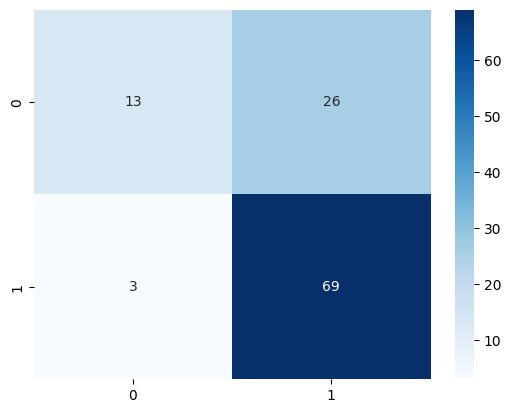

In [56]:
y_pred = knn.predict(X_test_scaled)



print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')




Classification Report:


<Axes: >

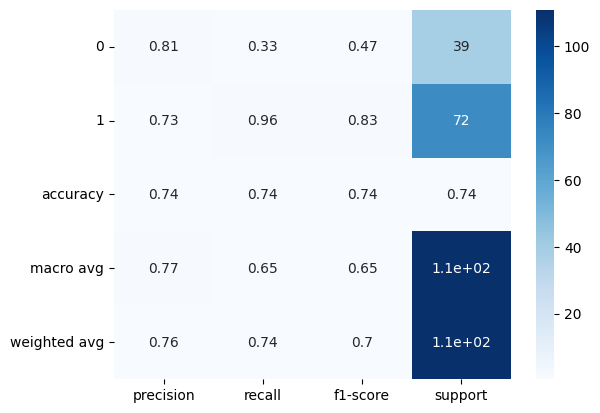

In [57]:

print("\nClassification Report:")
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T, annot=True, cmap='Blues')
